In [80]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Read original CSV data
filename = "E:/Work/DS/Programming/vehicle.csv"
vehicledf = pd.read_csv(filename)

In [82]:
GATENAME = {5: 'วิศวกรรมศาสตร์',
 30: 'แยก อมช',
 34: 'แยกบริหาร',
 4: 'เกษตรศาสตร์',
 33: 'วงเวียนหอนาฬิกา',
 1: 'หน้ามหาวิทยาลัย',
 27: 'วงเวียนสนามเทนนิส',
 25: 'วงเวียนมนุษย์',
 32: 'แยกโรงอาหารใหม่',
 41: 'สวนดอกพาร์ค',
 23: 'วงเวียน SCB',
 24: 'วงเวียนอ่างตาดชมพู',
 36: 'วิศวกรรมศาสตร์ใหม่',
 3: 'คันคลองชลประทาน',
 22: 'แยกอ่างแก้ว',
 26: 'แยกประตูไผ่ล้อม',
 2: 'ไผ่ล้อม',
 29: 'ลานจอดรถ อมช',
 31: 'ลานจอดรถฝายหิน',
 42: 'POC-ENG-in',
 20: 'แยกตึกอธิการบดี',
 18: 'ศึกษาศาสตร์',
 38: 'ลานจอดรถ  S1',
 19: 'ปตท.ใหม่',
 35: 'ลานจอดรถไร่ฟอร์ด',
 28: 'ลานจอดรถหอ 40 ปี',
 21: 'ลานจอดรถหน้ามอ',
 40: 'จอดรถโรงอาหารกลาง',
 37: 'อาคารสำนักงาน 3',
 39: 'ข่วงพยอม'}

In [83]:
vehicledf.head()

,Unnamed: 0,plate_number,type,is_registered,direction,gate_id,month,day,hour,min,sec
0,0,1กง2501,motorcycle,True,o,5,March,7,16,18,11
1,1,กง7559,car,False,o,30,March,7,16,18,10
2,2,กพพ815,motorcycle,False,o,34,March,7,16,18,10
3,3,5กณ4065,car,False,o,4,March,7,16,18,8
4,4,ขค6235,car,True,o,33,March,7,16,18,10


# Data Cleaning and Encoding

Get rid of some unnecessary columns and encode features:

In [100]:
def clean(df):
    return df.drop(columns = ['Unnamed: 0'])
def encode(df):
    df['plate_number'] = df['plate_number'].astype('category').cat.codes
    #df['type'] = df['type'].astype('category').cat.codes # 0 as car 1 as motorcycle
    #df['is_registered'] = df['is_registered'].astype('category').cat.codes # 0 as false 1 as true
    #df['direction'] = df['direction'].astype('category').cat.codes # 0 as i 1 as o


In [101]:
df = clean(vehicledf)
encode(df)

In [102]:
df.head()

,plate_number,type,is_registered,direction,gate_id,month,day,hour,min,sec
0,38311,motorcycle,True,o,5,March,7,16,18,11
1,467588,car,False,o,30,March,7,16,18,10
2,515857,motorcycle,False,o,34,March,7,16,18,10
3,387004,car,False,o,4,March,7,16,18,8
4,582418,car,True,o,33,March,7,16,18,10


# Feature Transformation

Rearrange months:

In [103]:
months = ['January','February','March','April','May','June']
df['month']=pd.Categorical(df['month'],months)

Get only the information at main gates:

In [104]:
gatemask = True

In [105]:
'''{19: 'ปตท.ใหม่',
 4: 'เกษตรศาสตร์',
 3: 'คันคลองชลประทาน',
 1: 'หน้ามหาวิทยาลัย',
 36: 'วิศวกรรมศาสตร์ใหม่',
 5: 'วิศวกรรมศาสตร์',
 2: 'ไผ่ล้อม',
 18: 'ศึกษาศาสตร์',
 42: 'POC-ENG-in'}
'''
if gatemask:
    entrance_mask = [19,3,4,1,36,5,2,18,42]
    df2 = df[df['gate_id'].isin(entrance_mask )]

Don't care what time of the day the vehicle get in or out, count only the numbers of time they do.

In [106]:
df2 = df2.drop(columns = ['min','sec'])

In [107]:
df2.head()

,plate_number,type,is_registered,direction,gate_id,month,day,hour
0,38311,motorcycle,True,o,5,March,7,16
3,387004,car,False,o,4,March,7,16
5,98095,motorcycle,False,o,4,March,7,16
7,903488,car,False,o,5,March,7,16
8,216697,motorcycle,False,i,1,March,7,16


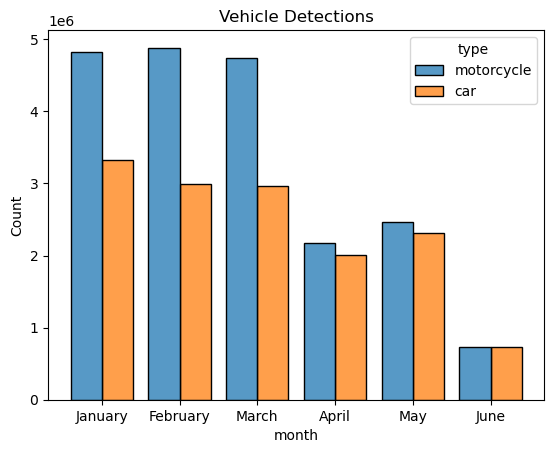

In [92]:
sns.histplot(data = df, x = 'month', binwidth=0.8, hue = 'type', multiple =  'dodge', shrink=.8)
plt.title('Vehicle Detections')
plt.show()

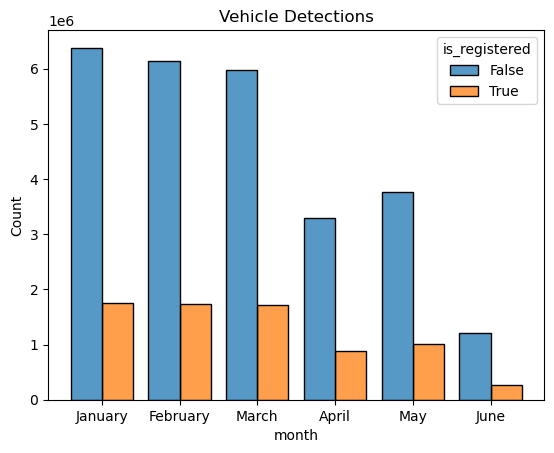

In [108]:
sns.histplot(data = df, x = 'month', binwidth=0.8, hue = 'is_registered', multiple =  'dodge', shrink=.8)
plt.title('Vehicle Detections')
plt.show()

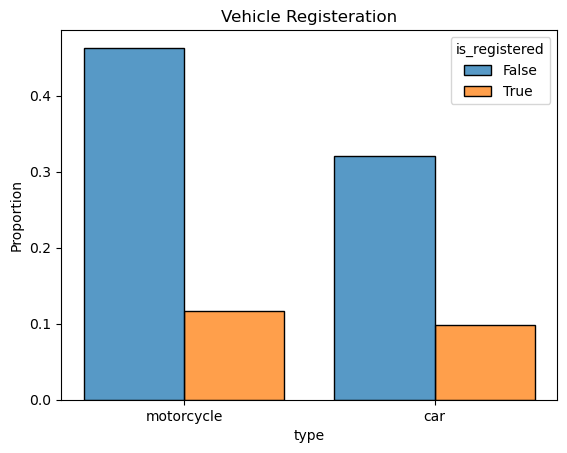

In [116]:
plot = sns.histplot(data = df, x = 'type', binwidth=0.8, hue = 'is_registered', multiple =  'dodge', shrink=.8, stat = 'proportion')
plt.title('Vehicle Registeration')
plt.show()

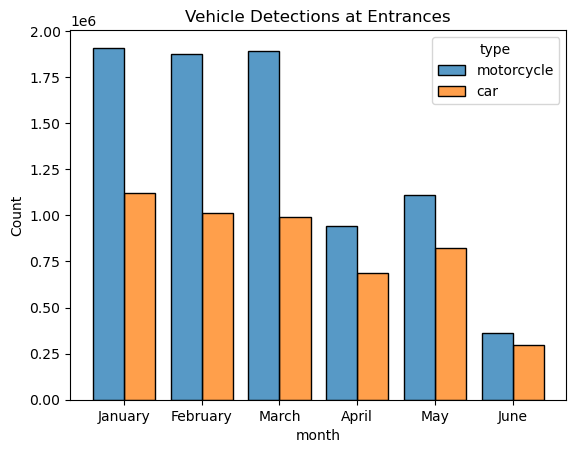

In [95]:
sns.histplot(data = df2, x = 'month', binwidth=0.8, hue = 'type', multiple =  'dodge', shrink=.8)
plt.title('Vehicle Detections at Entrances')
plt.show()

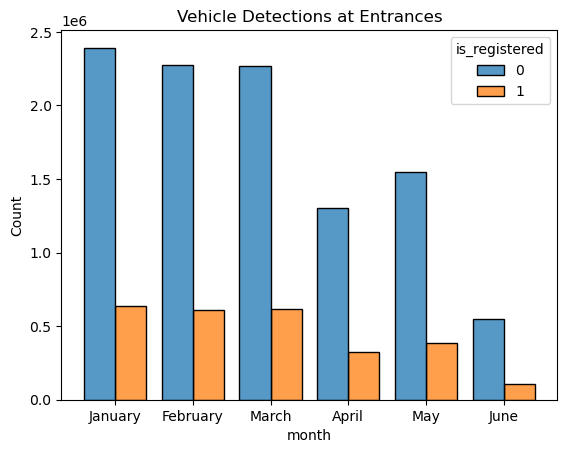

In [96]:
sns.histplot(data = df2, x = 'month', binwidth=0.8, hue = 'is_registered', multiple =  'dodge', shrink=.8)
plt.title('Vehicle Detections at Entrances')
plt.show()

In [97]:
df3 = df2[df2['direction'] == 'i']
df4 = df2[df2['direction'] == 'o']

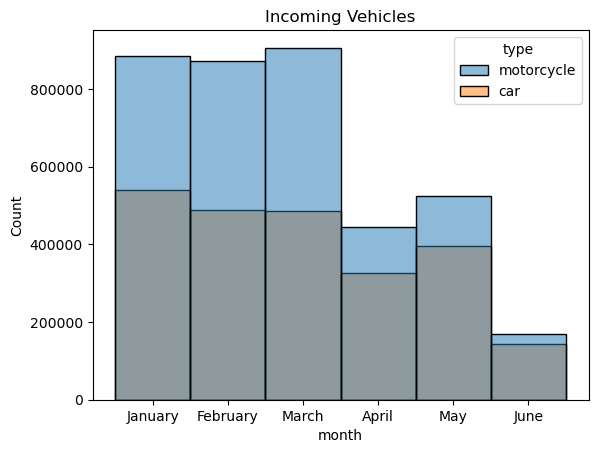

In [98]:
sns.histplot(data = df3, x = 'month', binwidth=1, hue = 'type')
plt.title('Incoming Vehicles')
plt.show()

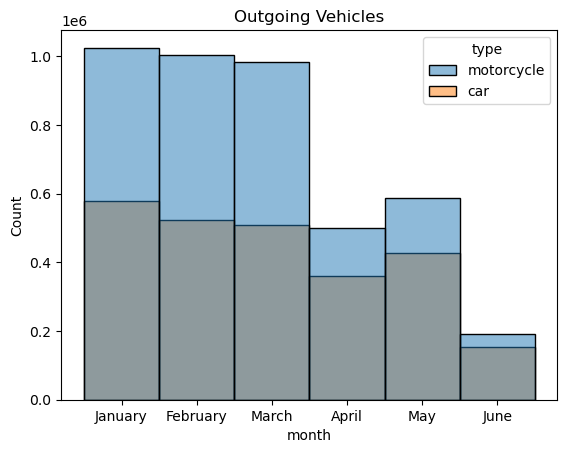

In [99]:
sns.histplot(data = df4, x = 'month', binwidth=1, hue = 'type')
plt.title('Outgoing Vehicles')
plt.show()